In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Load and preprocess the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values to [0, 1]

# Add a channel dimension to the input data (for CNN)
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

# Create the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # Output layer with 10 classes (digits 0-9)
])


11490434/11490434 [==============================] - 1s 0us/step


In [2]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [3]:
# stats about data

print("Number of training examples:", x_train.shape[0])
print("Number of testing examples:", x_test.shape[0])
print("Image data shape:", x_train[0].shape)
print("Sample Class labels:", y_train[0])


Number of training examples: 60000
Number of testing examples: 10000
Image data shape: (28, 28, 1)
Sample Class labels: 5


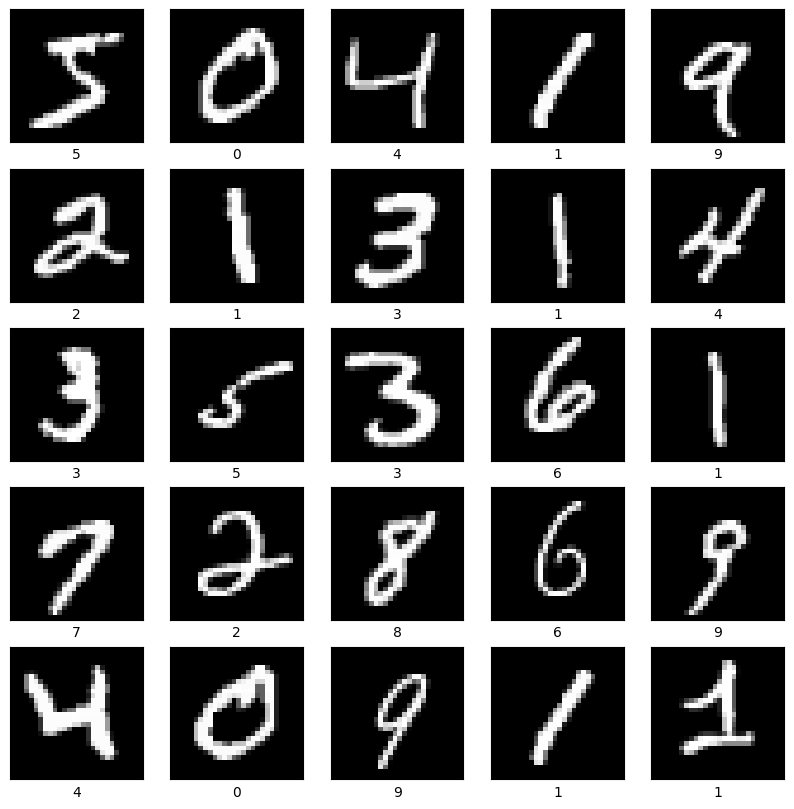

In [4]:
# Display some training images
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap='gray')
    plt.xlabel(y_train[i])
plt.show()


In [5]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Epoch 1/5
1875/1875 [==============================] - 78s 37ms/step - loss: 0.1477 - accuracy: 0.9544 - val_loss: 0.0431 - val_accuracy: 0.9849
Epoch 2/5
1875/1875 [==============================] - 59s 32ms/step - loss: 0.0460 - accuracy: 0.9858 - val_loss: 0.0365 - val_accuracy: 0.9881
Epoch 3/5
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0346 - accuracy: 0.9888 - val_loss: 0.0322 - val_accuracy: 0.9896
Epoch 4/5
1875/1875 [==============================] - 59s 32ms/step - loss: 0.0248 - accuracy: 0.9921 - val_loss: 0.0270 - val_accuracy: 0.9912
Epoch 5/5
313/313 [==============================] - 3s 9ms/step - loss: 0.0325 - accuracy: 0.9893
Test accuracy: 0.989300012588501


In [ ]:
# Train the model
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

In [6]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)

313/313 [==============================] - 5s 15ms/step - loss: 0.0325 - accuracy: 0.9893
Test accuracy: 0.989300012588501


In [11]:
predictions = model.predict(x_test)

313/313 [==============================] - 3s 11ms/step


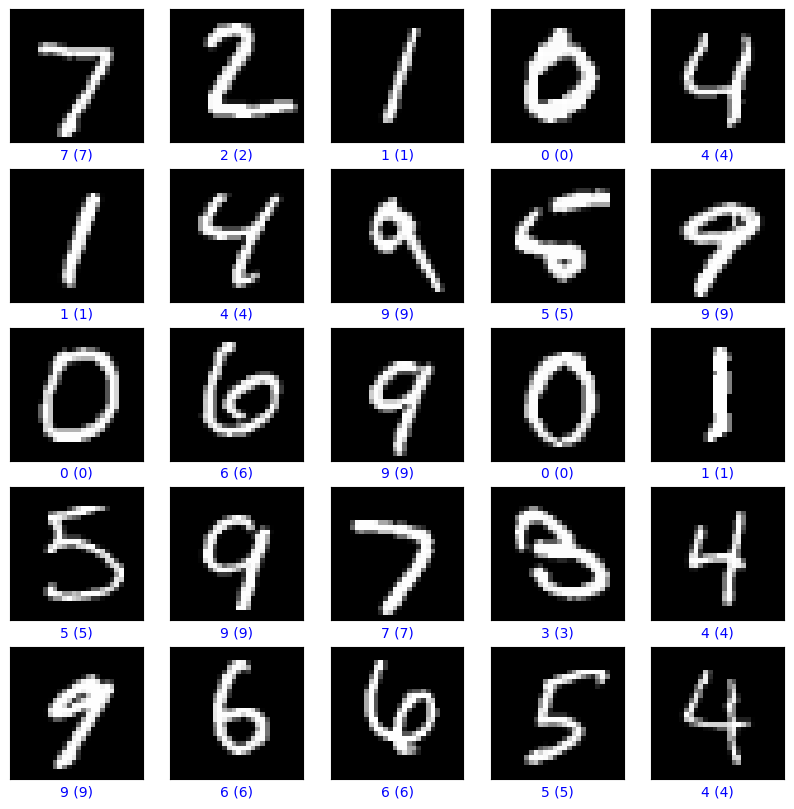

In [12]:
import numpy as np
# Visualize the predictions
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap='gray')
    predicted_label = np.argmax(predictions[i])
    true_label = y_test[i]
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} ({})".format(predicted_label, true_label), color=color)
plt.show()